*Welcome to our notebook where we will be delving into a fascinating project on predicting the placements of engineering students. We will be exploring various factors such as CGPA, internships, backlogs, gender, stream, and more to develop an accurate prediction model. Join us as we dive into the world of data analysis and machine learning to uncover insights that could potentially impact the future of engineering placements. Let's get started!*


## Loading Tools

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px

In [3]:
df = pd.read_csv("/kaggle/input/engineering-placements-prediction/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


## Basic EDA

In [4]:
df.shape

(2966, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [6]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [7]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [8]:
# Nothing just shortening the name

mapping = {"Electronics And Communication": "ECE", "Computer Science": "CSE", "Information Technology": "IT", "Mechanical": "MECH", "Civil": "Civil", "Electrical": "EC"}

df["Stream"] = df["Stream"].map(mapping)


In [9]:
df['Stream'].value_counts()

CSE      776
IT       691
ECE      424
MECH     424
EC       334
Civil    317
Name: Stream, dtype: int64

In [10]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


## Checking Outliers

<AxesSubplot:xlabel='Age'>

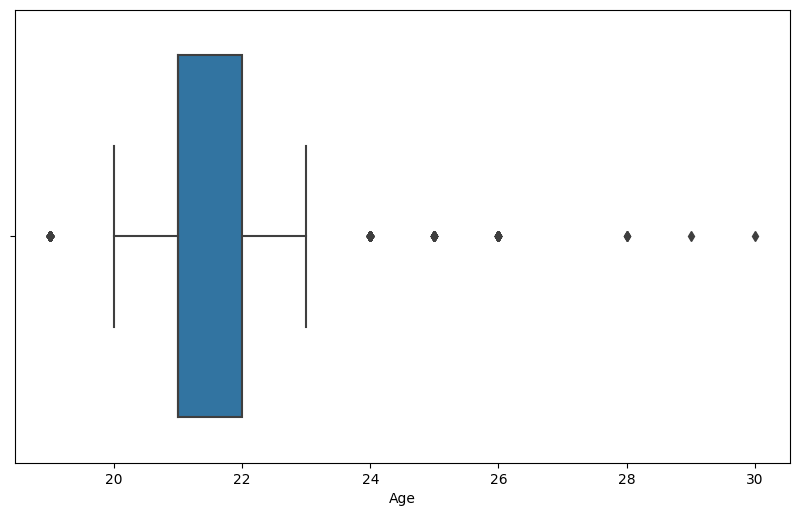

In [11]:
# I tried all the columns and find out that only age column has some outliers.

plt.figure(figsize = (10, 6), dpi = 100)
sns.boxplot(x = "Age", data = df)

## Removing Outliers

In [12]:
max_thresold = df['Age'].quantile(0.95)
print(max_thresold)

min_thresold = df['Age'].quantile(0.01)
print(min_thresold)

df = df[(df['Age']<max_thresold) & (df['Age']>min_thresold)]

24.0
19.0


## Data Visualization

<AxesSubplot:xlabel='Stream', ylabel='count'>

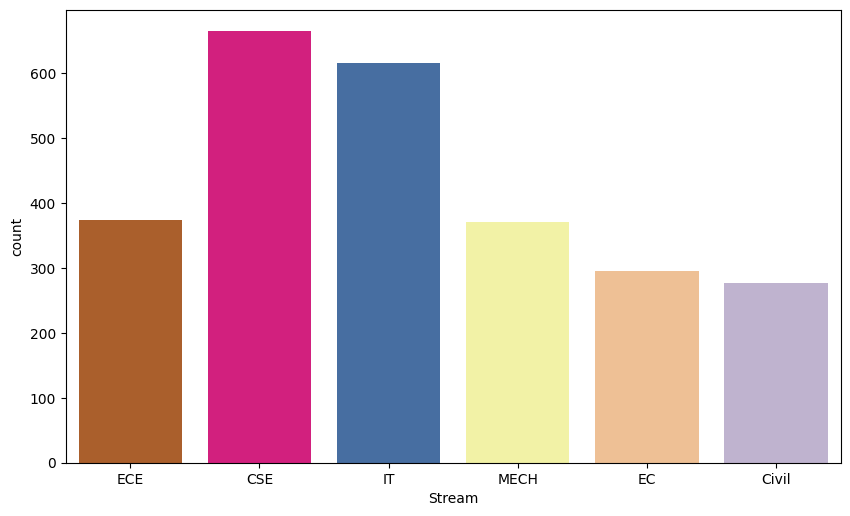

In [13]:
plt.figure(figsize = (10, 6), dpi = 100)


color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

sns.countplot(x = "Stream", data = df)

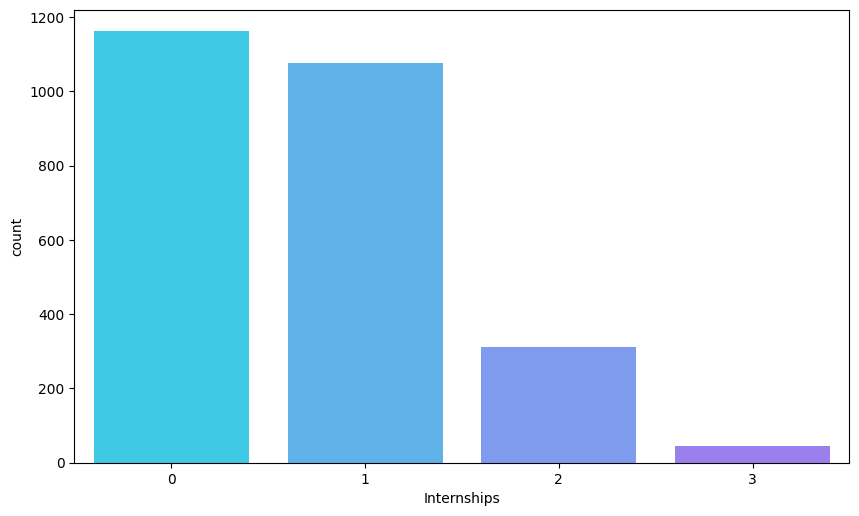

In [14]:
plt.figure(figsize = (10, 6), dpi = 100)


color_palette = sns.color_palette("cool")
sns.set_palette(color_palette)

sns.countplot(x = "Internships", data = df)
plt.show()

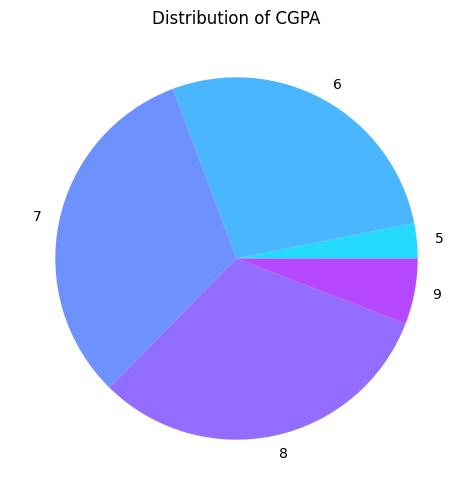

In [15]:
plt.figure(figsize = (10, 6), dpi = 100)
grp = dict(df.groupby('CGPA').groups)

m = {}

for key, val in grp.items():
    
    if key in m:
        m[key] += len(val)
        
    else:
        m[key] = len(val)

    
plt.title("Distribution of CGPA")
plt.pie(m.values(), labels = m.keys())
plt.show()

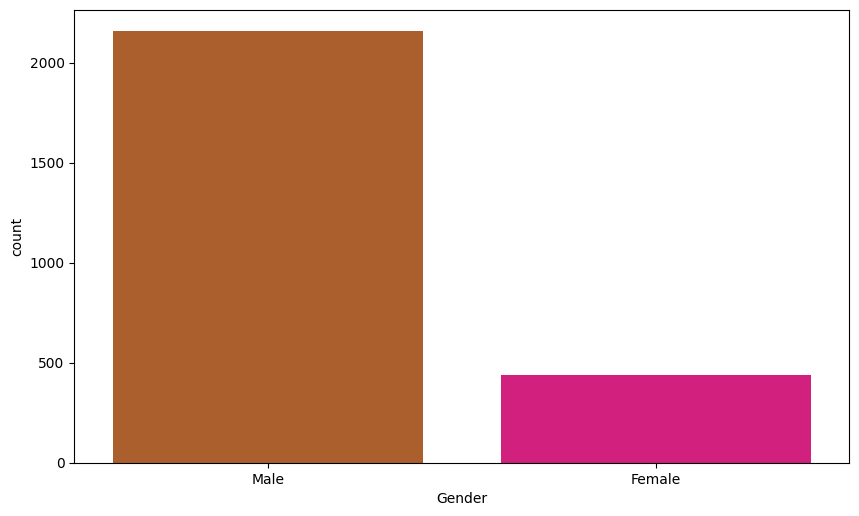

In [16]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

sns.countplot(x = "Gender", data = df)

plt.show()

## Relationships

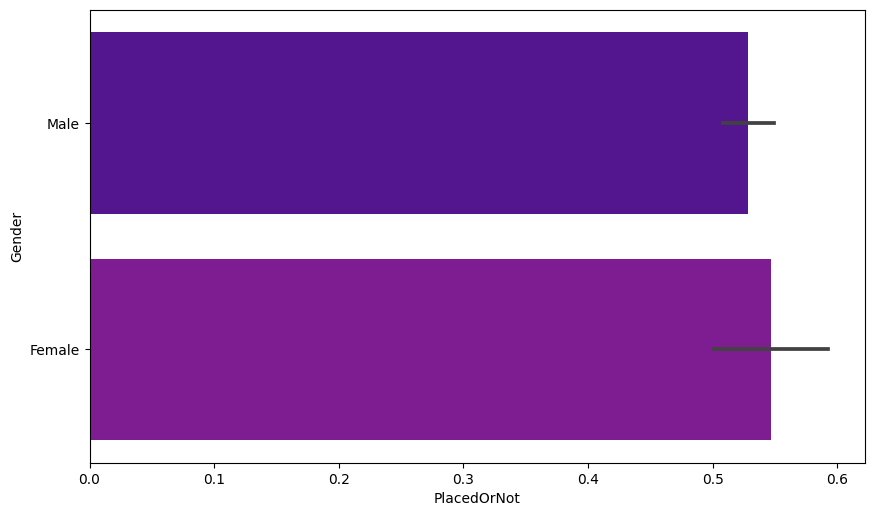

In [17]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("plasma")
sns.set_palette(color_palette)

sns.barplot(x = "PlacedOrNot", y = "Gender", data = df)

plt.show()

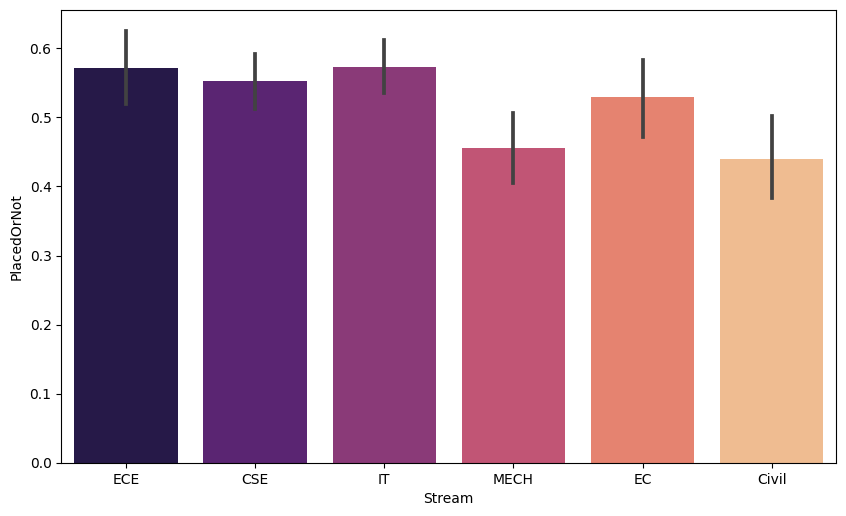

In [18]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("magma")
sns.set_palette(color_palette)

sns.barplot(x = "Stream", y = "PlacedOrNot", data = df)

plt.show()

## Finally, how many placed?

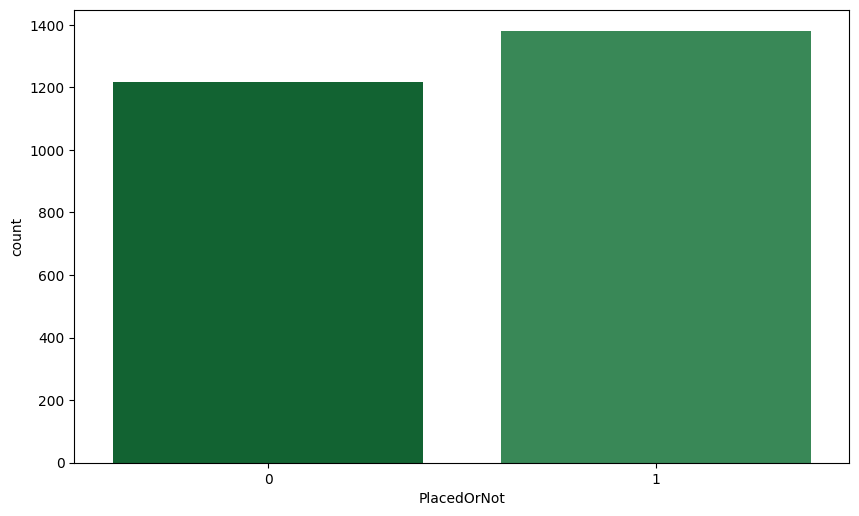

In [19]:
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("BuGn_r")
sns.set_palette(color_palette)

sns.countplot(x = "PlacedOrNot", data = df)

plt.show()

## Correlation

<AxesSubplot:>

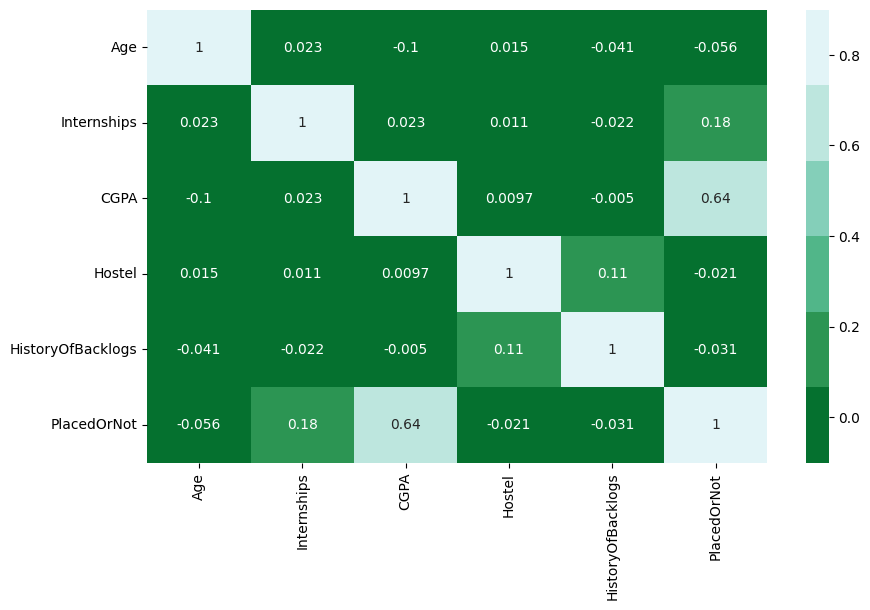

In [20]:
plt.figure(figsize = (10, 6), dpi = 100)
color = sns.color_palette("BuGn_r")
sns.heatmap(df.corr(), vmax=0.9, annot=True,cmap = color)

It can be seen from the above graph that the CGPA is the most important feature among all.

## Model 1: RandomForestClassifier

Transforming Categorical variables into numerical. Because RandomForestClassifier Works only with numerical data.

In [21]:
le = preprocessing.LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Stream"] = le.fit_transform(df["Stream"])

In [22]:
X=df[['Age', 'Gender', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'Stream']]
y= df["PlacedOrNot"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

clff = RandomForestClassifier().fit(x_train,y_train)

pred = clff.predict(x_test)

## Accuracy of RandomForestClassifier

In [23]:
acc = accuracy_score(y_test, pred)
acc

0.8818998716302953

## Model 2: CatBoostClassifier

In [24]:
from catboost import CatBoostClassifier

X = df[['Age', 'Gender', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'Stream']]

y = df["PlacedOrNot"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100)

clf = CatBoostClassifier(
    
    iterations = 5, 
    learning_rate = 0.1, 
    loss_function='CrossEntropy',
    
).fit(x_train, y_train)


pred = clf.predict(x_test)


0:	learn: 0.6410786	total: 56.9ms	remaining: 227ms
1:	learn: 0.5947409	total: 57.7ms	remaining: 86.5ms
2:	learn: 0.5558258	total: 58ms	remaining: 38.7ms
3:	learn: 0.5267040	total: 58.5ms	remaining: 14.6ms
4:	learn: 0.5015275	total: 58.8ms	remaining: 0us


## Accuracy of CatBoostClassifier

In [25]:
acc = accuracy_score(y_test, pred)
acc

0.8741976893453145

## Conclusion

In this project, we utilize two powerful machine learning models - Random Forest and CatBoost - to predict placements of engineering students. We apply various techniques such as outlier detection and removal, correlation analysis, and categorical variable encoding to preprocess the data and improve model performance. Additionally, we conduct in-depth data analysis and visualization to gain deeper insights into the data. Feel free to experiment with other models or tune hyperparameters to further enhance the model's accuracy. Let's dive in and keep exploring! 🚀

### Thanks for reading this notebook. Upvote it if you found it useful 😇.
### Checkout my other notebooks 🙃
* [XGBoost V/S LightGBM](https://www.kaggle.com/code/neesham/xgboost-v-s-lightgbm)
* [🔥 Pandas V/S SQL](https://www.kaggle.com/code/neesham/pandas-v-s-sql)
* [🔥 Transformers for Beginners (P1)](https://www.kaggle.com/code/neesham/transformers-for-beginners-p1)